In [37]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from random import choice, choices, randint
from scipy.stats import skewnorm
plt.rc('text',usetex=True)
plt.rc('font',family='serif')

In [2]:
# create hotels!

class Hotel():
    def __init__(self,price,pools,beach,restaurants,entertainment,travel_plan,gyms,location,user_rating,
                 rating_count):
        self.price = price # price per night for one person
        assert price > 0
        self.pools = pools # number of pools
        assert type(pools) == int and pools >= 0
        self.beach = beach # is there a beach?
        assert beach in [0,1]
        self.restaurants = restaurants # number of restaurants
        assert type(restaurants) == int and restaurants >= 0
        self.entertainment = entertainment # is there entertainment?
        assert entertainment in [0,1]
        self.travel_plan = travel_plan # is there a partnered travel plan?
        assert travel_plan in [0,1]
        self.gyms = gyms # number of gyms
        assert type(gyms) == int and gyms >= 0
        self.location = location # general location
        assert location in ["Canada","US","Mexico","Central America","Caribbean","South America","Africa",
                            "Middle East","Western Europe","Mediterranean","Scandinavia","Eastern Europe",
                            "Southeast Asia","South Asia","East Asia","Australia","Polynesia"]
        self.user_rating = user_rating # average rating from users
        assert user_rating == None or (user_rating >= 1 and user_rating <= 5)
        self.rating_count = rating_count # number of user ratings
        assert type(rating_count) == int and rating_count >= 0

In [3]:
# create a lot of hotels!

locations = ["Canada","US","Mexico","Central America","Caribbean","South America","Africa",
             "Middle East","Western Europe","Mediterranean","Scandinavia","Eastern Europe",
             "Southeast Asia","South Asia","East Asia","Australia","Polynesia"]
beaches = [0,1]
ent_check = [0,1]
plans = [0,1]
i = 0
num = int(input("Enter how many hotels you would like to create: "))
hotel_set = []
while i < num:
    loc = choice(locations)
    beach = choice(beaches)
    ent = choice(ent_check)
    plan = choice(plans)
    pools = np.random.poisson(1.5)
    resto = np.random.poisson(2)
    gyms = np.random.poisson(1)
    price = int(100+150*beach + 25*resto + 50*ent + 50*plan + 
                                 25*gyms + 50*pools + 25*skewnorm.rvs(-2))
    count = int(800 + 300*skewnorm.rvs(-1))
    if count > 0:
        rating = round(np.random.normal(price**0.5/4.7,0.3),1)
        if rating < 1:
            rating = 1
        elif rating > 5:
            rating = 5
    else:
        count = 0
        rating = None
    if price <= 0:
        continue
    else:
        hotel_set.append(Hotel(price,pools,beach,resto,ent,plan,gyms,loc,rating,count))
    i += 1

Enter how many hotels you would like to create: 100000


In [16]:
# create a pandas dataframe with the hotels made.
columns = vars(hotel_set[0])
Hotels = pd.DataFrame([getattr(H,x) for x in list(vars(H).keys())] for H in hotel_set)
Hotels.columns = columns
Hotels.to_csv("HotelRatings.csv")

----

In [5]:
'''create a linear and quadratic regression model to calculate price given user ratings (only takes hotels that
have a rating)'''

RatedHotels = Hotels.dropna()
Xq = np.array(list(zip(np.ones(len(RatedHotels)),np.array(RatedHotels.user_rating),
                      np.array(RatedHotels.user_rating)**2)))
Xl = np.array(list(zip(np.ones(len(RatedHotels)),np.array(RatedHotels.user_rating))))
b = np.array(RatedHotels.price)
yq = la.inv(Xq.T@Xq)@Xq.T@b
yl = la.inv(Xl.T@Xl)@Xl.T@b

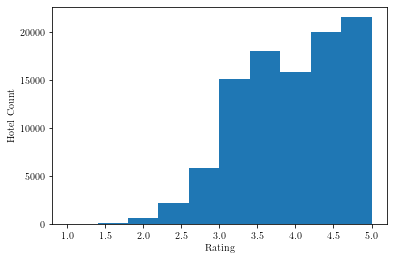

In [51]:
plt.hist(Hotels["user_rating"])
plt.xlabel("Rating")
plt.ylabel("Hotel Count")
plt.show()

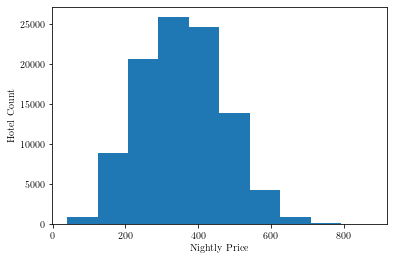

In [52]:
plt.hist(Hotels["price"])
plt.xlabel("Nightly Price")
plt.ylabel("Hotel Count")
plt.show()

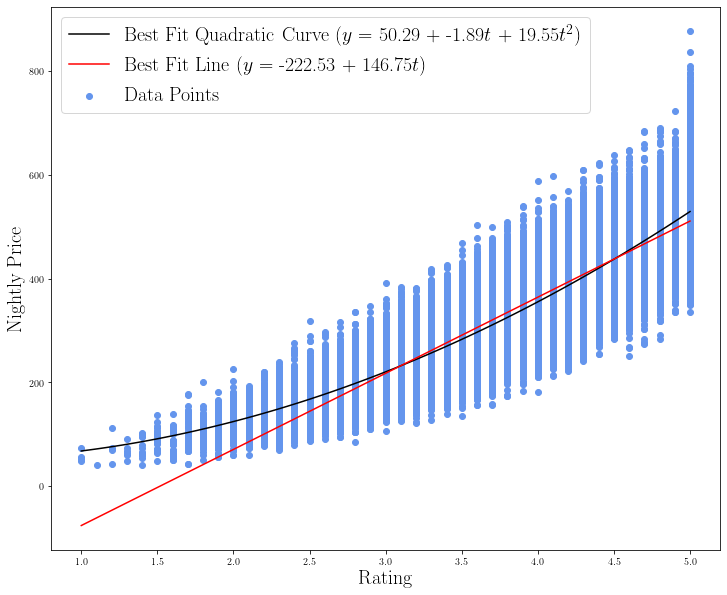

In [49]:
plt.figure(figsize = (12,10))
plt.scatter(Hotels.user_rating,Hotels.price,color = "cornflowerblue",label = "Data Points")

t = np.linspace(1,5,75)
plt.plot(t,yq[0] + yq[1]*t + yq[2]*t**2,color = "k",label = "Best Fit Quadratic Curve $(y = $ "+
         str(round(yq[0],2))+" + "+str(round(yq[1],2))+"$t$ + "+str(round(yq[2],2)) + "$t^2)$")
plt.plot(t,yl[0] + yl[1]*t,color = "r",label = "Best Fit Line $(y = $ "+str(round(yl[0],2))+
         " + "+str(round(yl[1],2))+"$t)$")

plt.ylabel("Nightly Price",fontsize = "20")
plt.xlabel("Rating",fontsize = "20")
plt.legend(fontsize="20")
plt.show()

In [17]:
'''Find a hotel in Canada that is under $200 per night and has a rating over 3.5 stars.'''
Hotels[(Hotels.location == "Canada")&(Hotels.price <= 200)&(Hotels.user_rating >= 3.5)]

,price,pools,beach,restaurants,entertainment,travel_plan,gyms,location,user_rating,rating_count
24527,175,1,0,3,0,0,0,Canada,3.6,353
48504,196,1,0,1,0,0,2,Canada,3.5,841
50848,184,0,0,3,0,0,1,Canada,3.5,1082
75734,198,1,0,0,1,0,1,Canada,3.6,660
79156,197,0,0,1,1,1,1,Canada,3.6,964
79401,198,1,0,1,0,0,1,Canada,3.5,433
89840,183,2,0,0,0,0,1,Canada,3.6,489
99683,186,2,0,1,0,0,0,Canada,3.6,202


In [18]:
'''Find a hotel in the Caribbean that has a beach, has a rating of at least 4.5 stars, has over 1000 ratings, 
and has at least 5 restaurants.'''
Hotels[(Hotels.location == "Caribbean")&(Hotels.beach == 1)&(Hotels.user_rating >= 4.5)&
       (Hotels.restaurants >= 5)&(Hotels.rating_count >= 1000)]

,price,pools,beach,restaurants,entertainment,travel_plan,gyms,location,user_rating,rating_count
13925,595,3,1,5,1,0,1,Caribbean,5.0,1115
21810,493,3,1,5,0,0,0,Caribbean,4.8,1274
29770,443,1,1,6,0,0,0,Caribbean,4.5,1000
46340,479,1,1,6,0,0,2,Caribbean,4.5,1174
71972,591,4,1,5,1,0,0,Caribbean,5.0,1327
86033,450,1,1,6,0,0,0,Caribbean,4.5,1115


In [19]:
'''Find a hotel in either Western Europe or the Mediterranean that costs under $450, has a rating of 5 stars,
and has at least 3 pools.'''
Hotels[((Hotels.location == "Western Europe")|(Hotels.location == "Mediterranean"))&(Hotels.price <= 450)&
       (Hotels.user_rating == 5)&(Hotels.pools >= 3)]

,price,pools,beach,restaurants,entertainment,travel_plan,gyms,location,user_rating,rating_count
12117,423,4,1,0,0,0,0,Mediterranean,5.0,485
16183,424,5,0,1,1,0,1,Mediterranean,5.0,915
17555,449,3,0,2,1,1,2,Western Europe,5.0,948
18290,444,3,1,2,0,0,1,Mediterranean,5.0,219
18476,447,5,0,5,0,0,0,Mediterranean,5.0,763
20939,376,3,0,3,0,1,1,Western Europe,5.0,1010
43992,423,3,0,1,1,1,2,Mediterranean,5.0,852
67414,447,3,0,5,1,0,1,Western Europe,5.0,463
76922,394,3,0,2,1,1,1,Western Europe,5.0,756
80681,450,3,0,4,1,1,0,Mediterranean,5.0,486


In [13]:
'''One customer is feeling adventurous. This customer wants to try a new hotel anywhere in the world with no 
ratings, a travel plan, and a nightly price of a over $600.'''
Hotels[(pd.isna(Hotels.user_rating))&(Hotels.travel_plan == 1)&(Hotels.price >= 600)]

,price,pools,beach,restaurants,entertainment,travel_plan,gyms,location,user_rating,rating_count
10880,709,4,1,5,1,1,2,Canada,NaN,0
11479,648,3,1,4,1,1,3,Eastern Europe,NaN,0
12608,670,6,1,2,1,1,1,Polynesia,NaN,0
31145,635,4,1,1,1,1,3,Central America,NaN,0
36017,662,4,1,1,1,1,3,Canada,NaN,0
52766,617,2,1,6,1,1,2,East Asia,NaN,0
60433,603,5,1,1,1,1,1,Africa,NaN,0
68174,626,5,1,3,0,1,2,Polynesia,NaN,0
68556,608,4,1,0,1,1,2,Scandinavia,NaN,0
73191,704,6,1,1,1,1,2,Africa,NaN,0
